In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()

#Loaded the dataset
df = pd.read_csv("Glucose_Level_Estimation.csv")

print(df.shape)
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

Saving Glucose_Level_Estimation.csv to Glucose_Level_Estimation (1).csv
(249, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            249 non-null    int64  
 1   GENDER         249 non-null    object 
 2   WEIGHT         248 non-null    float64
 3   SKIN_COLOR     249 non-null    int64  
 4   NIR_Reading    244 non-null    float64
 5   HEARTRATE      246 non-null    float64
 6   HEIGHT         247 non-null    float64
 7   LAST_EATEN     247 non-null    float64
 8   DIABETIC       247 non-null    object 
 9   HR_IR          244 non-null    float64
 10  GLUCOSE_LEVEL  249 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 21.5+ KB
None
   AGE GENDER  WEIGHT  SKIN_COLOR  NIR_Reading  HEARTRATE  HEIGHT  LAST_EATEN  \
0   22      F    42.0           2       335.15       62.0     5.3         2.0   
1   22     

In [4]:
# Handled the missing values
# For numerical columns, fill with median (robust to outliers)
num_cols = ['WEIGHT','NIR_Reading','HEARTRATE','HEIGHT','LAST_EATEN','HR_IR']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical, fill with mode
cat_cols = ['DIABETIC','GENDER']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fix outlier in LAST_EATEN (-1 -> set to median or minimum valid)
df['LAST_EATEN'] = df['LAST_EATEN'].apply(lambda x: df['LAST_EATEN'].median() if x < 0 else x)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])   # M/F → 0/1
df['DIABETIC'] = le.fit_transform(df['DIABETIC'])  # Y/N → 0/1

print(df.isnull().sum())
df.head()


AGE              0
GENDER           0
WEIGHT           0
SKIN_COLOR       0
NIR_Reading      0
HEARTRATE        0
HEIGHT           0
LAST_EATEN       0
DIABETIC         0
HR_IR            0
GLUCOSE_LEVEL    0
dtype: int64


,AGE,GENDER,WEIGHT,SKIN_COLOR,NIR_Reading,HEARTRATE,HEIGHT,LAST_EATEN,DIABETIC,HR_IR,GLUCOSE_LEVEL
0,22,0,42.0,2,335.15,62.0,5.3,2.0,0,96762.0,110
1,22,0,76.0,2,574.25,98.0,5.8,3.0,0,94521.0,93
2,22,0,40.0,1,349.30,70.0,5.1,3.0,0,97073.0,75
3,21,0,64.0,2,450.35,108.0,5.3,3.0,0,92609.0,228
4,21,0,40.0,2,362.15,64.0,5.3,3.0,0,88058.0,133


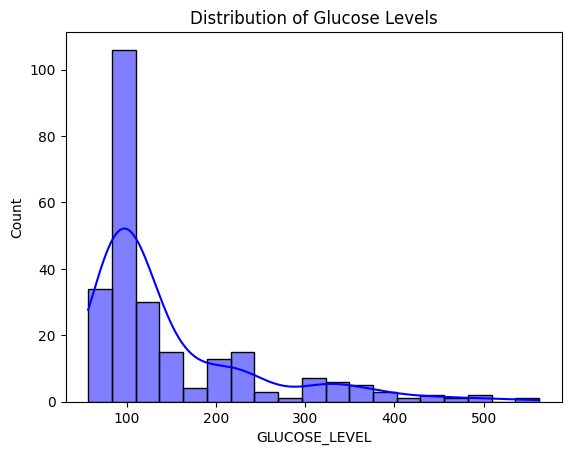

In [6]:
# Glucose level distribution
sns.histplot(df['GLUCOSE_LEVEL'], kde=True, color='blue')
plt.title("Distribution of Glucose Levels")
plt.show()

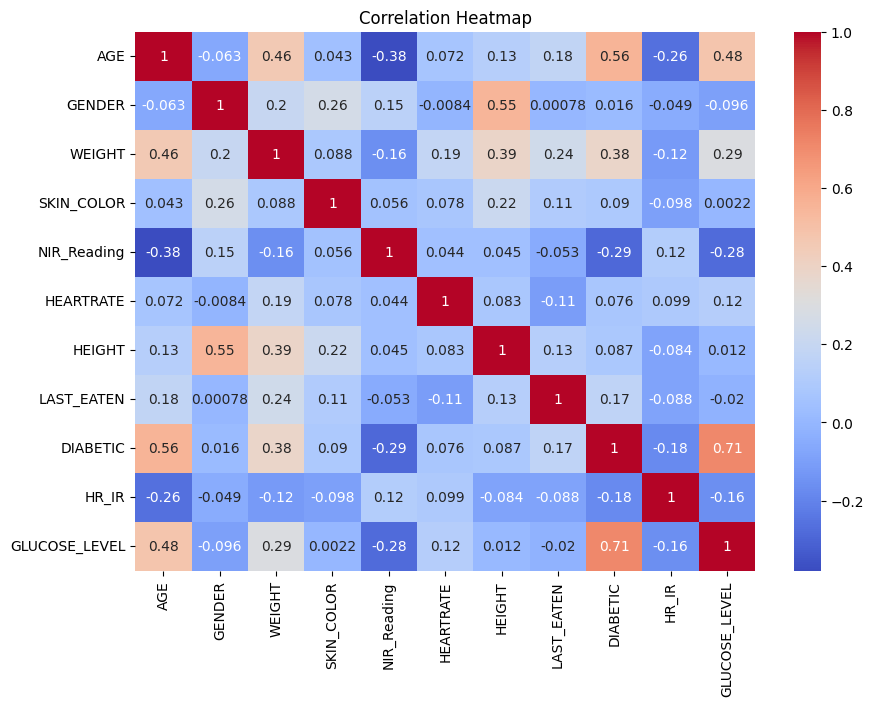

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

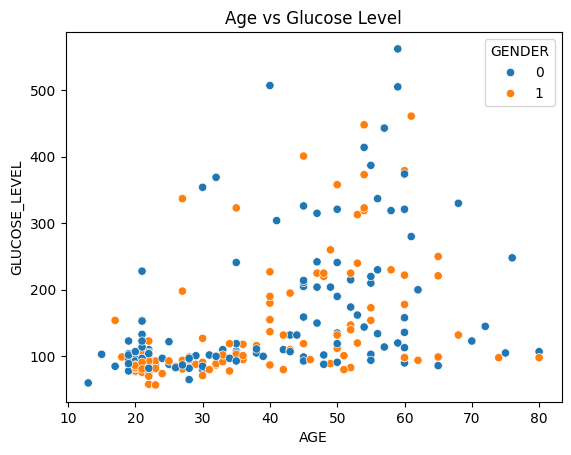

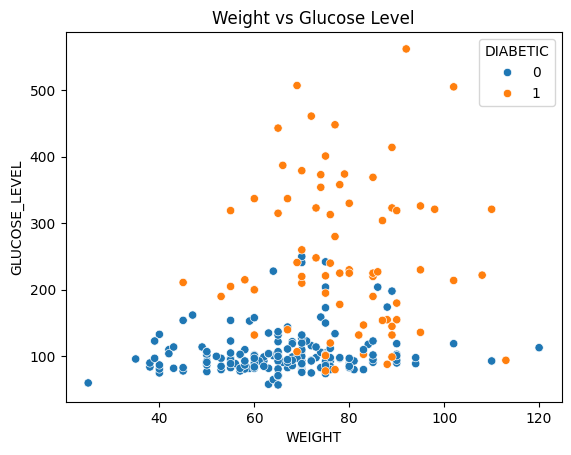

In [8]:
# Scatter plots
sns.scatterplot(x=df['AGE'], y=df['GLUCOSE_LEVEL'], hue=df['GENDER'])
plt.title("Age vs Glucose Level")
plt.show()

sns.scatterplot(x=df['WEIGHT'], y=df['GLUCOSE_LEVEL'], hue=df['DIABETIC'])
plt.title("Weight vs Glucose Level")
plt.show()

In [10]:
#Standardization of Data

X = df.drop("GLUCOSE_LEVEL", axis=1)
y = df["GLUCOSE_LEVEL"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [14]:
#Linear Regression with Gradient Descent
from sklearn.linear_model import SGDRegressor

lr = SGDRegressor(max_iter=1000, eta0=0.01, random_state=42)
lr.fit(X_train, y_train)

y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

print("📊 Linear Regression")
print("Train MSE:", mean_squared_error(y_train, y_pred_train_lr))
print("Test MSE:", mean_squared_error(y_test, y_pred_test_lr))
print("R2 Score:", r2_score(y_test, y_pred_test_lr))

📊 Linear Regression
Train MSE: 4188.433738184034
Test MSE: 3586.0649517300994
R2 Score: 0.5101834978741722


In [16]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\n Decision Tree")
print("Test MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

print("\n Random Forest")
print("Test MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


 Decision Tree
Test MSE: 10187.88
R2 Score: -0.39155085388795263

 Random Forest
Test MSE: 4033.067834
R2 Score: 0.4491278864502982


In [18]:
# Chose the model with best R² score
import joblib
best_model = rf
joblib.dump(best_model, "best_model.pkl")

print(" Best model saved as best_model.pkl")

 Best model saved as best_model.pkl
